# Imports

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing data
data=pd.read_csv('googleplaystore.csv')

# Removing null values

In [4]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
#dropping null values
data.dropna(inplace=True)

In [6]:
#Checking for null values
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# Formatting variables

In [7]:
data['Size'].value_counts()

Varies with device    1637
14M                    165
12M                    161
15M                    159
11M                    159
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 413, dtype: int64

In [8]:
def change(Size):
    if 'M' in Size:
        x=Size[:-1]
        x=float(x)*1000
        return x
    elif 'k' in Size:
        x=Size[:-1]
        x=float(x)
        return x
    else:
        return None

In [9]:
data['Size']=data['Size'].map(change)

In [10]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
data.Size.fillna(method='ffill',inplace=True)

In [12]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [13]:
data['Reviews']=data['Reviews'].astype('int')

In [14]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [15]:
data['Installs']=data['Installs'].str.replace('[+,]','')

C:\Users\AdrianMarioghae\AppData\Local\Temp\ipykernel_17188\1241127784.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Installs']=data['Installs'].str.replace('[+,]','')


In [16]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [17]:
data['Installs']=data['Installs'].astype('int')

In [18]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [19]:
data['Price']=data['Price'].str.replace('$','')

C:\Users\AdrianMarioghae\AppData\Local\Temp\ipykernel_17188\1843015269.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price']=data['Price'].str.replace('$','')


In [20]:
data['Price']=data['Price'].astype('float')

# Sanity Checks

In [21]:
data[(data.Rating<1)|(data.Rating>5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


No ratings fall below 1 or above 5 so nothing to drop

In [22]:
data[data.Reviews>data.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,30000.0,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [23]:
# Drop values where reviews exceed installs
data.drop(data[data.Reviews>data.Installs].index,inplace=True)

In [24]:
data[(data.Type=='Free')&(data.Price>0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


No apps listed as 'Free' have a price above 0 so no values to drop

# Univariate analysis

In [25]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Price'>

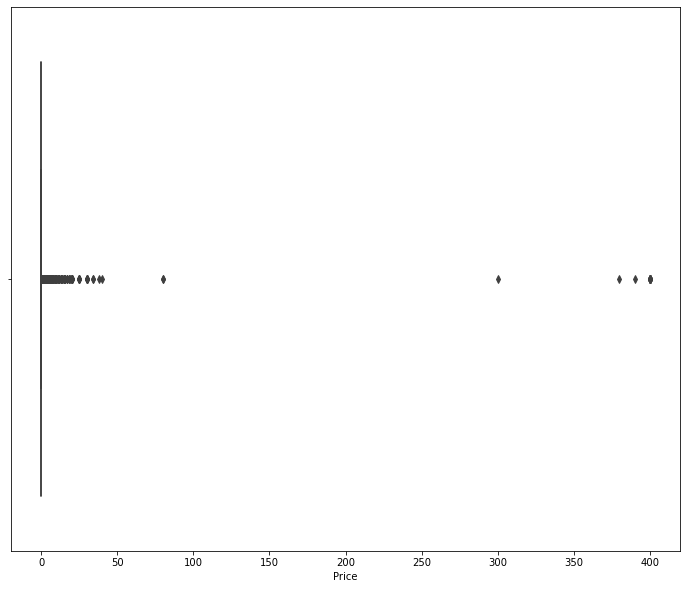

In [26]:
# Price boxplot
plt.figure(figsize=[12,10])
sns.boxplot(data.Price)

Seems to be many outliers, some of which are extremely high (4 outliers are above 300).

<AxesSubplot:xlabel='Reviews'>

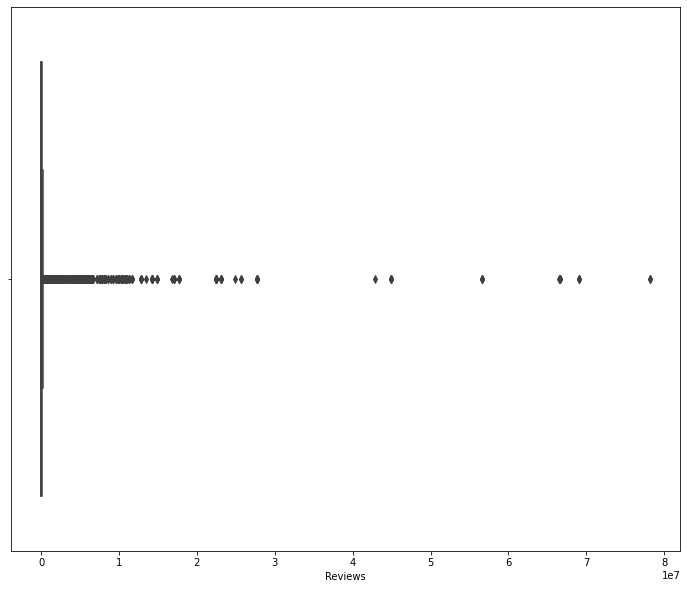

In [27]:
# Reviews boxplot
plt.figure(figsize=[12,10])
sns.boxplot(data.Reviews)

Multiple outliers for reviews, again several of which seem to be high

<AxesSubplot:xlabel='Rating', ylabel='Count'>

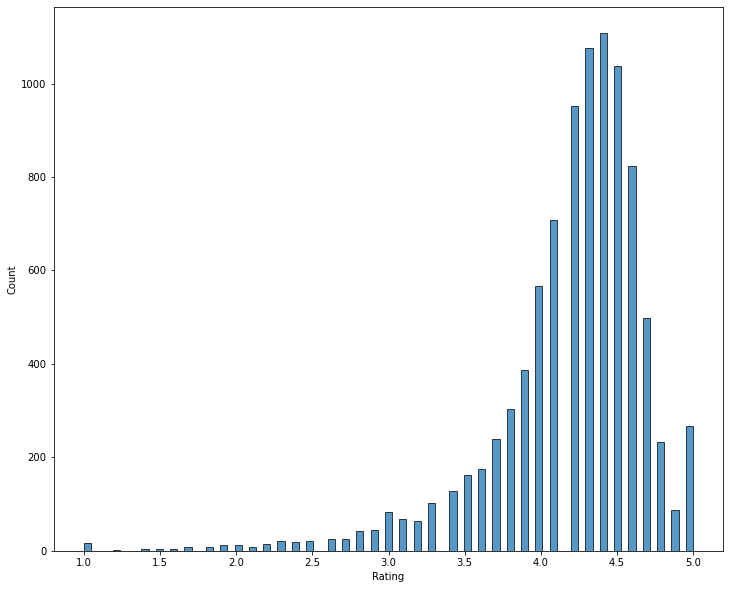

In [28]:
# Ratings histogram
plt.figure(figsize=[12,10])
sns.histplot(data.Rating)

Distribution is skewed towards higher ratings, particularly between 4.0-4.5 range

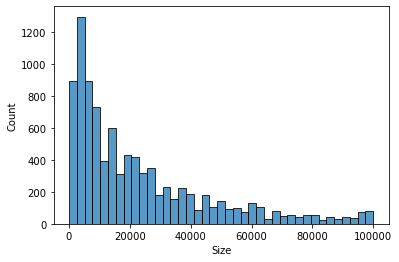

In [29]:
# Size histogram
sns.histplot(data.Size)
plt.show()

Data is quite heavily skewed right, so many apps lean towards being smaller in size

# Outlier Treatment

In [30]:
data.describe()

,Rating,Reviews,Size,Installs,Price
count,9353.000000,9.353000e+03,9353.000000,9.353000e+03,9353.000000
mean,4.191254,5.147606e+05,23147.924997,1.792215e+07,0.961467
std,0.515010,3.146169e+06,23252.056438,9.129920e+07,15.827539
min,1.000000,1.000000e+00,8.500000,5.000000e+00,0.000000
25%,4.000000,1.870000e+02,5500.000000,1.000000e+04,0.000000
50%,4.300000,5.967000e+03,15000.000000,5.000000e+05,0.000000
75%,4.500000,8.174700e+04,33000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


In [31]:
data.Price.quantile([0.1,0.25,0.5,0.75,0.9,0.95,0.99])

0.10    0.00
0.25    0.00
0.50    0.00
0.75    0.00
0.90    0.00
0.95    1.99
0.99    8.99
Name: Price, dtype: float64

Even 99% quartile is 8.99 so 200 seems to be very high for price

In [32]:
data[data.Price>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [33]:
data.drop(data[data.Price>200].index,inplace=True)

In [34]:
data[data.Reviews>=2000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,3100.0,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,35000.0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,35000.0,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,17000.0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,17000.0,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,Modern Combat 5: eSports FPS,GAME,4.3,2903386,58000.0,100000000,Free,0.0,Mature 17+,Action,"July 24, 2018",3.2.1c,4.0 and up
9841,Google Earth,TRAVEL_AND_LOCAL,4.3,2339098,63000.0,100000000,Free,0.0,Everyone,Travel & Local,"June 18, 2018",9.2.17.13,4.1 and up
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71000.0,100000000,Free,0.0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.0,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up


In [35]:
data.drop(data[data.Reviews>=2000000].index,inplace=True)

In [36]:
data.Installs.quantile([0.1,0.25,0.5,0.7,0.9,0.95,0.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

Chose the cutoff as 95%

In [37]:
data.drop(data[data.Installs>100000000].index,inplace=True)

# Bivariate analysis

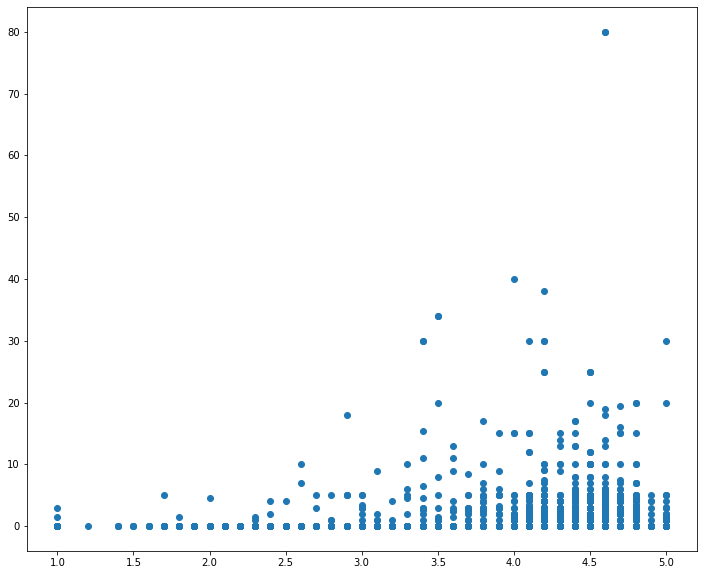

In [38]:
# Ratings vs Price scatterplot
plt.figure(figsize=[12,10])
plt.scatter(x='Rating',y='Price',data=data)

Rating does seem to increase with price as data is left skewed

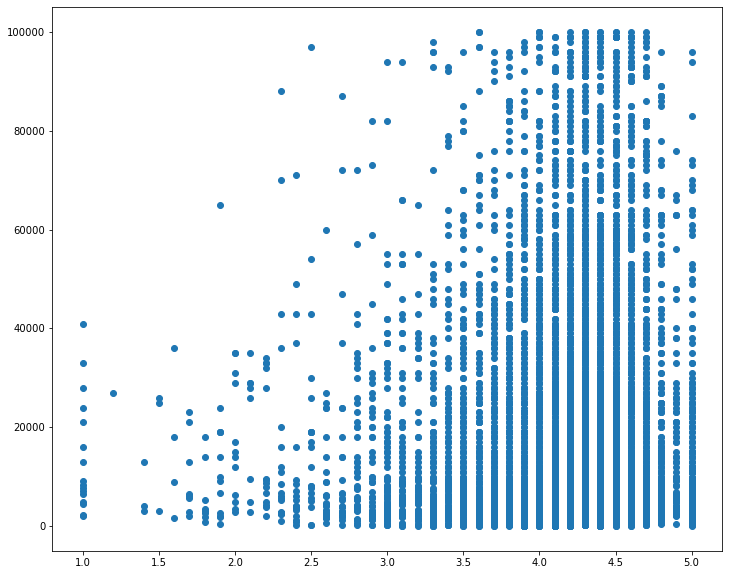

In [39]:
# Ratings vs size scatterplot
plt.figure(figsize=[12,10])
plt.scatter(x='Rating',y='Size',data=data)

Data is skewed right, suggesting heavier apps tend to have higher ratings

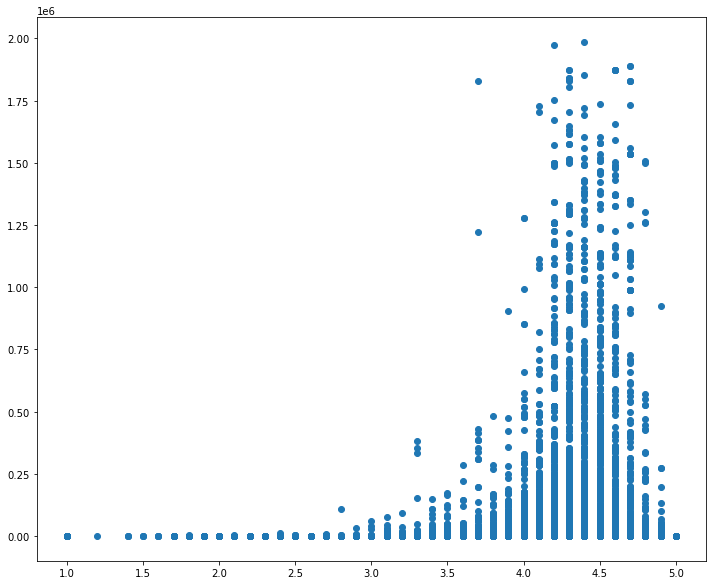

In [40]:
# Ratings vs Reviews scatterplot
plt.figure(figsize=[12,10])
plt.scatter(x='Rating',y='Reviews',data=data)

Positive skew suggests higher number of reviews can lead to a higher rating

<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

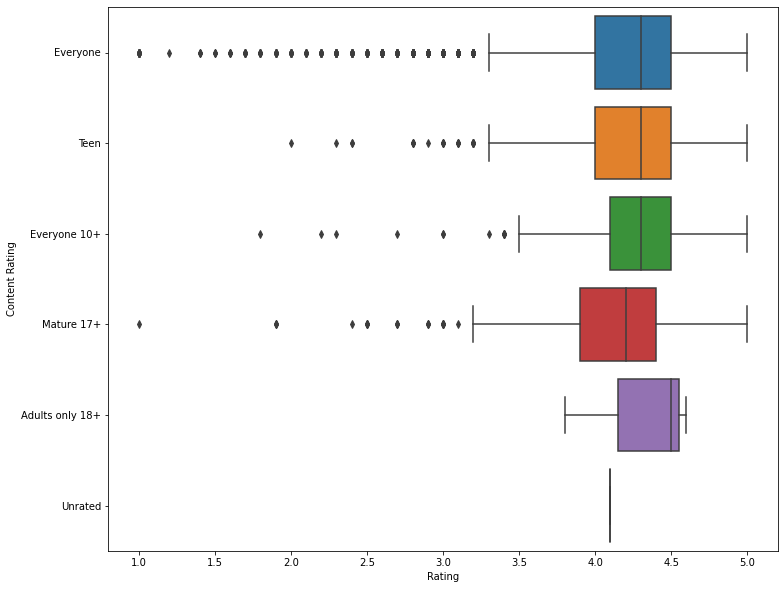

In [41]:
# Ratings vs Content Rating boxplot
plt.figure(figsize=[12,10])
sns.boxplot(x='Rating',y='Content Rating',data=data)

On average adult-only apps seem to be higher rated than others

<AxesSubplot:xlabel='Rating', ylabel='Category'>

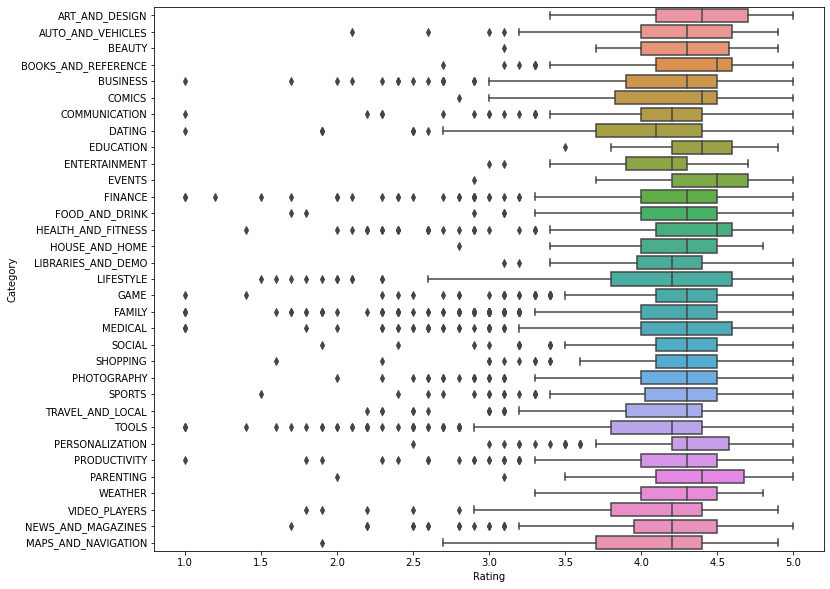

In [42]:
# Ratings vs Content boxplot
plt.figure(figsize=[12,10])
sns.boxplot('Rating','Category',data=data)

Events seems to be the best category by having a higher median and upper quartile than most other categories. Next closest would be parenting but the median falls lower than the median for events

# Data preprocessing

In [43]:
inp1=data.copy()

In [44]:
# Applying log transformations
inp1.Installs = inp1.Installs.apply(np.log1p)
inp1.Reviews = inp1.Reviews.apply(np.log1p)
inp1.Reviews

0         5.075174
1         6.875232
2        11.379520
3        12.281389
4         6.875232
           ...    
10834     2.079442
10836     3.663562
10837     1.609438
10839     4.744932
10840    12.894981
Name: Reviews, Length: 8865, dtype: float64

In [61]:
inp1.Installs

0         9.210440
1        13.122365
2        15.424949
3        17.727534
4        11.512935
           ...    
10834     6.216606
10836     8.517393
10837     4.615121
10839     6.908755
10840    16.118096
Name: Installs, Length: 8865, dtype: float64

In [45]:
inp1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [46]:
# Dropping columns not useful to the task
inp1.drop(["App","Last Updated","Current Ver","Android Ver","Type"],axis=1,inplace=True)

In [47]:
# Creating dummy columns
inp2=pd.get_dummies(inp1,columns=['Category','Genres','Content Rating'])

In [48]:
inp2

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,19000.0,9.210440,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4.5,12.281389,25000.0,17.727534,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4.3,6.875232,2800.0,11.512935,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,4.0,2.079442,2600.0,6.216606,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10836,4.5,3.663562,53000.0,8.517393,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10837,5.0,1.609438,3600.0,4.615121,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10839,4.5,4.744932,3600.0,6.908755,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


# Train Test Split

In [49]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(inp2,test_size=0.3,random_state=50)

In [50]:
inp2.shape

(8865, 159)

In [51]:
df_train.shape

(6205, 159)

In [52]:
df_test.shape

(2660, 159)

In [53]:
y_train = df_train.pop("Rating")
x_train = df_train

In [54]:
y_test = df_test.pop("Rating")
x_test = df_test

In [55]:
x_test

,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
1432,7.970740,23000.0,13.122365,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7313,2.639057,2500.0,6.908755,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7304,5.690359,3800.0,10.819798,0.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7465,2.197225,6300.0,4.615121,0.99,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4195,3.850148,26000.0,9.210440,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6413,1.609438,23000.0,2.397895,14.99,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3607,7.906915,24000.0,13.122365,0.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6792,6.456770,1400.0,11.512935,0.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9597,12.195921,28000.0,13.815512,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [56]:
y_test

1432    4.0
7313    3.6
7304    4.1
7465    4.6
4195    4.2
       ... 
6413    4.8
3607    4.2
6792    2.8
9597    4.5
4784    4.5
Name: Rating, Length: 2660, dtype: float64

# Model Building

In [57]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()

In [58]:
linear_reg.fit(x_train,y_train)

LinearRegression()

In [59]:
from sklearn.metrics import r2_score
y_train_pred= linear_reg.predict(x_train)
r2_score(y_train, y_train_pred)

0.1635587545126609

In [60]:
y_test_pred= linear_reg.predict(x_test)
r2_score(y_test, y_test_pred)

0.13661534018649535